In [1]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('Financial_Dataset.csv')

# Display initial data info
print("Initial Data Info:")
print(data.info())
print("\nFirst few rows of the dataset:")
print(data.head())

# Step 1: Handle missing values
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Since the dataset appears complete (based on provided data), we'll proceed. If missing values exist, we'd impute or drop them.
# For numerical columns, we could impute with median; for categorical, with mode.
# Example: data['Revenue'].fillna(data['Revenue'].median(), inplace=True)

# Step 2: Correct erroneous data
# Check for negative revenue or market cap, which might be errors
print("\nChecking for negative Revenue or Market_Cap:")
print(data[(data['Revenue'] < 0) | (data['Market_Cap'] < 0)])

# Replace negative Revenue or Market_Cap with median if any (none in this dataset, but included for robustness)
data['Revenue'] = data['Revenue'].apply(lambda x: data['Revenue'].median() if x < 0 else x)
data['Market_Cap'] = data['Market_Cap'].apply(lambda x: data['Market_Cap'].median() if x < 0 else x)

# Check for outliers in numerical columns using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply outlier removal for key numerical columns
numerical_columns = ['Revenue', 'Net_Profit', 'Debt_to_Equity', 'Current_Ratio', 'EPS', 'Stock_Volatility', 'Market_Cap', 'Credit_Score']
for col in numerical_columns:
    data = remove_outliers(data, col)

# Step 3: Transform data
# Convert categorical columns to appropriate types
data['Credit_Risk_Score'] = data['Credit_Risk_Score'].astype('category')
data['Stock_Trend'] = data['Stock_Trend'].astype('category')

# Convert Quarter to a more usable format (e.g., numeric representation)
quarter_map = {'Q1': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4}
data['Quarter'] = data['Quarter'].map(quarter_map)

# Verify data types
print("\nData Types After Transformation:")
print(data.dtypes)

# Save cleaned dataset
data.to_csv('Cleaned_Financial_Dataset.csv', index=False)
print("\nCleaned dataset saved as 'Cleaned_Financial_Dataset.csv'")

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company_ID         3200 non-null   object 
 1   Quarter            3200 non-null   object 
 2   Revenue            3200 non-null   float64
 3   Net_Profit         3200 non-null   float64
 4   Debt_to_Equity     3200 non-null   float64
 5   Current_Ratio      3200 non-null   float64
 6   EPS                3200 non-null   float64
 7   Stock_Volatility   3200 non-null   float64
 8   Market_Cap         3200 non-null   float64
 9   Credit_Score       3200 non-null   int64  
 10  Credit_Risk_Score  3200 non-null   object 
 11  Stock_Trend        3200 non-null   object 
dtypes: float64(7), int64(1), object(4)
memory usage: 300.1+ KB
None

First few rows of the dataset:
  Company_ID Quarter  Revenue  Net_Profit  Debt_to_Equity  Current_Ratio  \
0       C103      Q2  349

In [2]:
data = pd.read_csv('Cleaned_Financial_Dataset.csv')

NameError: name 'df' is not defined

Summary Statistics:
           Quarter      Revenue   Net_Profit  Debt_to_Equity  Current_Ratio  \
count  3200.000000  3200.000000  3200.000000     3200.000000    3200.000000   
mean      2.488125  2502.814225   630.793075        2.557694       2.737050   
std       1.127888  1423.547870   483.532505        1.417836       1.313889   
min       1.000000    50.150000  -199.910000        0.100000       0.500000   
25%       1.000000  1266.350000   219.445000        1.330000       1.580000   
50%       2.000000  2475.745000   620.580000        2.545000       2.720000   
75%       4.000000  3724.445000  1038.757500        3.810000       3.910000   
max       4.000000  4997.810000  1498.650000        5.000000       5.000000   

               EPS  Stock_Volatility   Market_Cap  Credit_Score  
count  3200.000000       3200.000000  3200.000000   3200.000000  
mean      7.800922         33.082884   252.905459    575.620625  
std       7.157858         15.997965   142.355188    160.040448  
min 

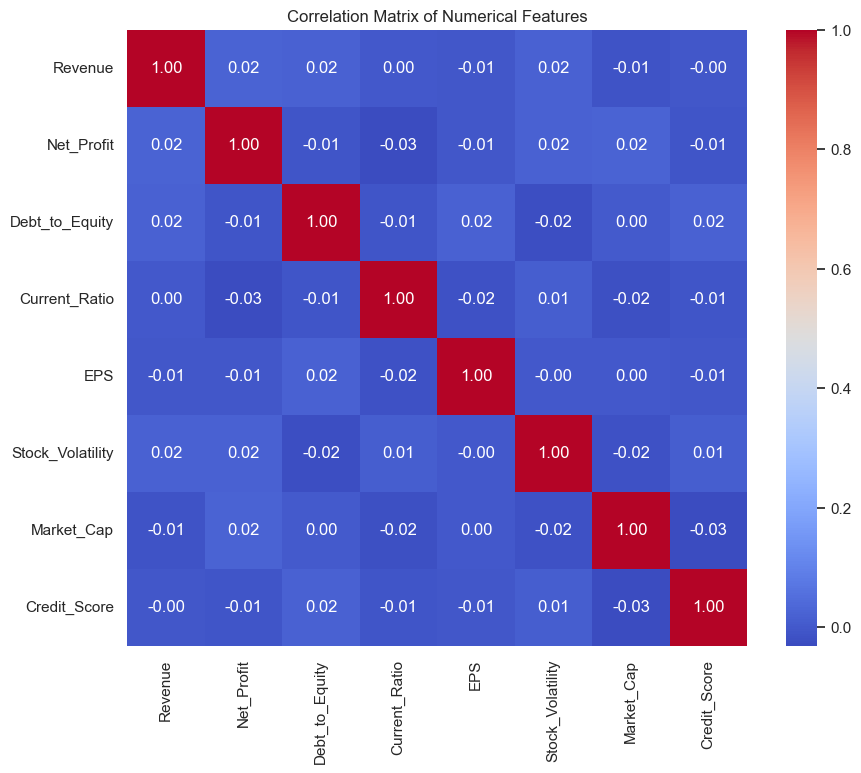

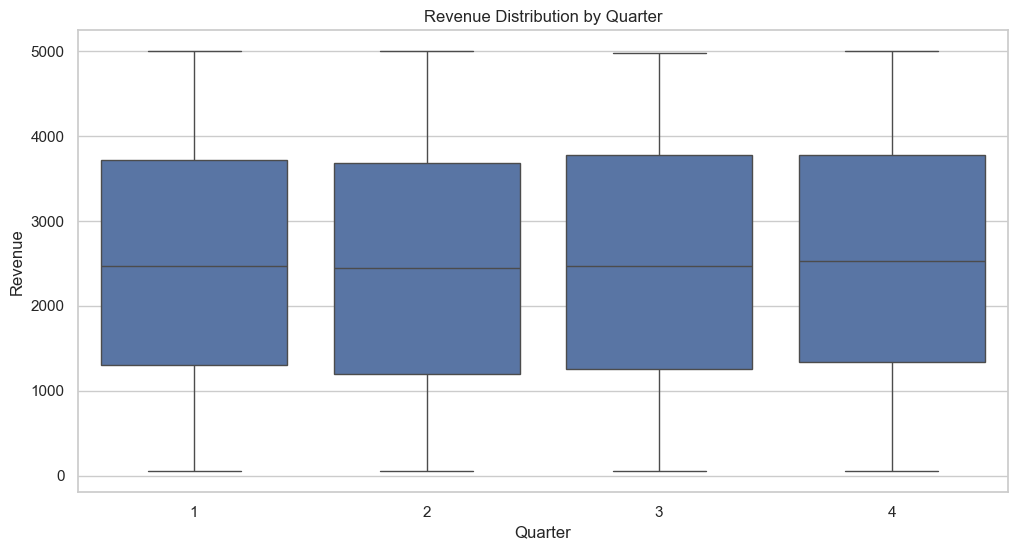

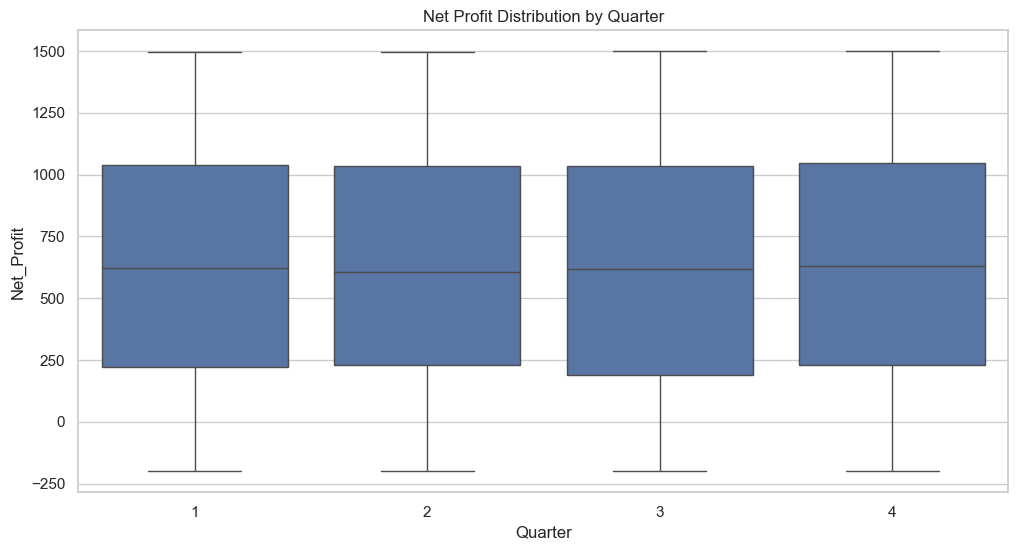

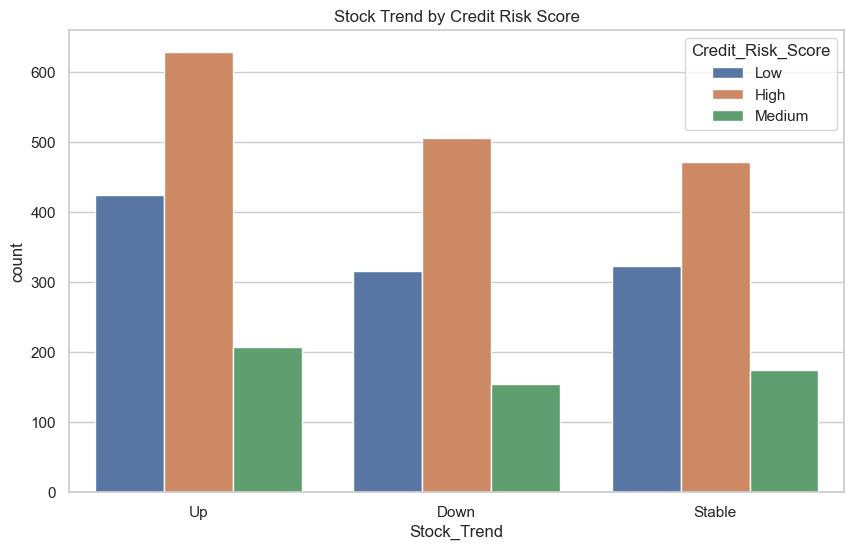

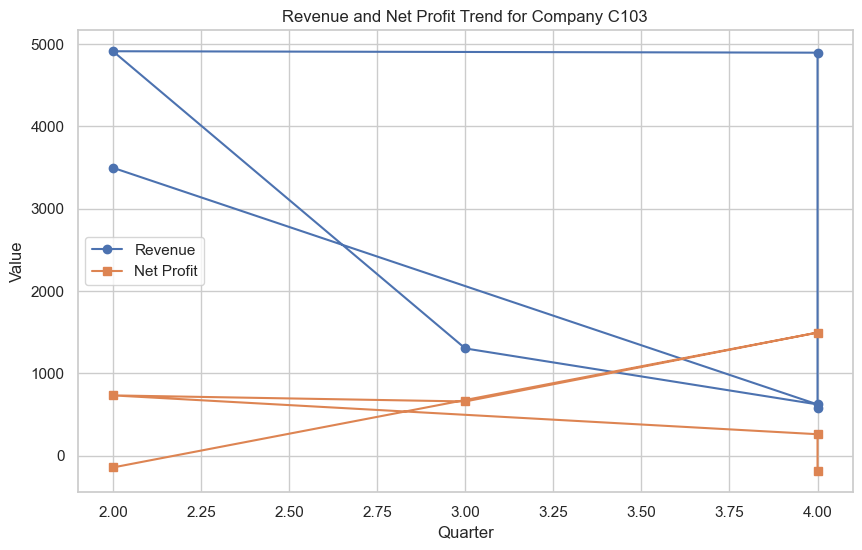


Key Insights:
Average Revenue by Stock Trend:
Stock_Trend
Down      2542.790986
Stable    2454.350041
Up        2509.110890
Name: Revenue, dtype: float64

Average Net Profit by Stock Trend:
Stock_Trend
Down      630.623224
Stable    638.281489
Up        625.172851
Name: Net_Profit, dtype: float64

Average Credit Score by Credit Risk:
Credit_Risk_Score
High      437.112219
Low       760.994345
Medium    623.257944
Name: Credit_Score, dtype: float64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
data = pd.read_csv('Cleaned_Financial_Dataset.csv')

# Set plot style
sns.set(style="whitegrid")

# 1. Summary statistics
print("Summary Statistics:")
print(data.describe())

# 2. Correlation analysis
plt.figure(figsize=(10, 8))
corr = data[numerical_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 3. Revenue and Net Profit trends by Quarter
plt.figure(figsize=(12, 6))
sns.boxplot(x='Quarter', y='Revenue', data=data)
plt.title('Revenue Distribution by Quarter')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Quarter', y='Net_Profit', data=data)
plt.title('Net Profit Distribution by Quarter')
plt.show()

# 4. Stock Trend analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Stock_Trend', hue='Credit_Risk_Score', data=data)
plt.title('Stock Trend by Credit Risk Score')
plt.show()

# 5. Company performance over quarters (for a sample company)
sample_company = 'C103'  # Example company
company_data = data[data['Company_ID'] == sample_company]
plt.figure(figsize=(10, 6))
plt.plot(company_data['Quarter'], company_data['Revenue'], marker='o', label='Revenue')
plt.plot(company_data['Quarter'], company_data['Net_Profit'], marker='s', label='Net Profit')
plt.title(f'Revenue and Net Profit Trend for Company {sample_company}')
plt.xlabel('Quarter')
plt.ylabel('Value')
plt.legend()
plt.show()

# 6. Key insights
print("\nKey Insights:")
# Revenue and Net Profit by Stock Trend
print("Average Revenue by Stock Trend:")
print(data.groupby('Stock_Trend')['Revenue'].mean())
print("\nAverage Net Profit by Stock Trend:")
print(data.groupby('Stock_Trend')['Net_Profit'].mean())

# Credit Score vs. Financial Metrics
print("\nAverage Credit Score by Credit Risk:")
print(data.groupby('Credit_Risk_Score')['Credit_Score'].mean())

In [8]:

import pandas as pd

# Load cleaned dataset
cleaned_data = pd.read_csv('Cleaned_Financial_Dataset.csv')

# Load original dataset for comparison (assumed available as Financial_Dataset.csv)
try:
    original_data = pd.read_csv('Financial_Dataset.csv')
except FileNotFoundError:
    print("Original dataset not found. Using cleaned data stats only.")

# Step 3.1: Compare data for accuracy
print("=== Data Accuracy Comparison ===")
print("Cleaned Dataset Shape:", cleaned_data.shape)
if 'original_data' in locals():
    print("Original Dataset Shape:", original_data.shape)
    print("Rows removed during cleaning:", original_data.shape[0] - cleaned_data.shape[0])
    # Compare key metrics
    print("\nMean Revenue - Original:", original_data['Revenue'].mean())
    print("Mean Revenue - Cleaned:", cleaned_data['Revenue'].mean())
    print("Mean Net Profit - Original:", original_data['Net_Profit'].mean())
    print("Mean Net Profit - Cleaned:", cleaned_data['Net_Profit'].mean())
    # Check for negative values
    print("\nNegative Revenue in Cleaned Data:", (cleaned_data['Revenue'] < 0).sum())
    print("Negative Market Cap in Cleaned Data:", (cleaned_data['Market_Cap'] < 0).sum())
else:
    print("\nCleaned Data Stats:")
    print("Mean Revenue:", cleaned_data['Revenue'].mean())
    print("Mean Net Profit:", cleaned_data['Net_Profit'].mean())
    print("Negative Revenue:", (cleaned_data['Revenue'] < 0).sum())
    print("Negative Market Cap:", (cleaned_data['Market_Cap'] < 0).sum())

print("Unique Companies:", cleaned_data['Company_ID'].nunique())
print("Unique Quarters:", cleaned_data['Quarter'].nunique())
print("Data Integrity Check - No missing values:", cleaned_data.isnull().sum().sum() == 0)


=== Data Accuracy Comparison ===
Cleaned Dataset Shape: (3200, 12)
Original Dataset Shape: (3200, 12)
Rows removed during cleaning: 0

Mean Revenue - Original: 2502.814225
Mean Revenue - Cleaned: 2502.814225
Mean Net Profit - Original: 630.7930749999999
Mean Net Profit - Cleaned: 630.7930749999999

Negative Revenue in Cleaned Data: 0
Negative Market Cap in Cleaned Data: 0
Unique Companies: 500
Unique Quarters: 4
Data Integrity Check - No missing values: True


In [12]:
import pandas as pd
df=pd.read_csv("Cleaned_Financial_Dataset.csv")
print(df.head())


  Company_ID  Quarter  Revenue  Net_Profit  Debt_to_Equity  Current_Ratio  \
0       C103        2  3497.33     -144.77            0.75           1.17   
1       C436        2  3525.62      811.97            1.94           2.52   
2       C349        2   899.88      716.63            3.39           1.75   
3       C271        4  2525.56     1446.98            3.93           4.74   
4       C107        3  2089.19      623.16            2.70           4.48   

     EPS  Stock_Volatility  Market_Cap  Credit_Score Credit_Risk_Score  \
0  16.58             39.61      369.33           818               Low   
1   4.00             59.71      452.12           488              High   
2  10.98             59.78      118.04           650            Medium   
3  18.05             52.17       88.11           582            Medium   
4  -1.21              8.51      348.26           456              High   

  Stock_Trend  
0          Up  
1        Down  
2          Up  
3          Up  
4      Stabl